# Kalman filtering benchmark 

In [2]:
%load_ext autoreload
%autoreload 2

### Import packages

In [1]:
import logging
import matplotlib.pyplot as plt

from logger import logger
from fileops import loadtif
from viewers import viewstack, viewstacks
from plotters import plot_stack_summary
from filters import KalmanDenoiser

logger.setLevel(logging.INFO)

### Load raw image stack

 21/10/2021 18:22:17: loaded (100, 256, 170) uint8 stack from "../../data/misc/insulinoma_raw.tif"
 21/10/2021 18:22:17: stack size: (90, 256, 170)
 21/10/2021 18:22:17: rendering stack view...


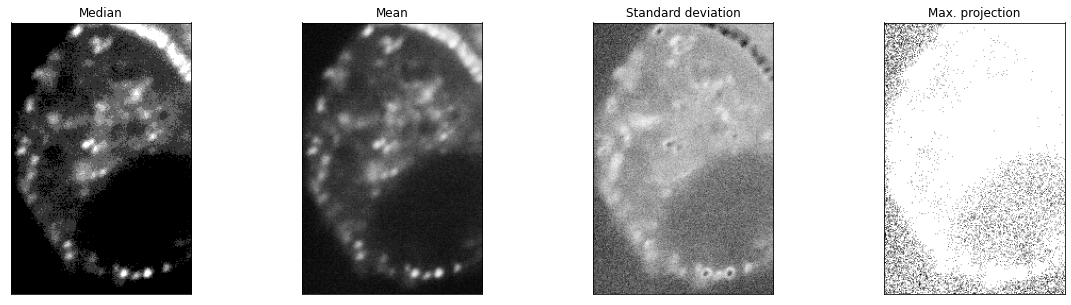

In [2]:
fpath = '../../data/misc/insulinoma_raw.tif'
stack = loadtif(fpath)[10:]
stack = stack / stack.max() * 255
fig = plot_stack_summary(stack)
viewstack(stack, title='Raw')

### Generate and visualize padding baseline

 21/10/2021 18:22:26: constructing 10-frames baseline from 90-frames stack...
 21/10/2021 18:22:26: stack size: (10, 256, 170)
 21/10/2021 18:22:26: rendering stack view...


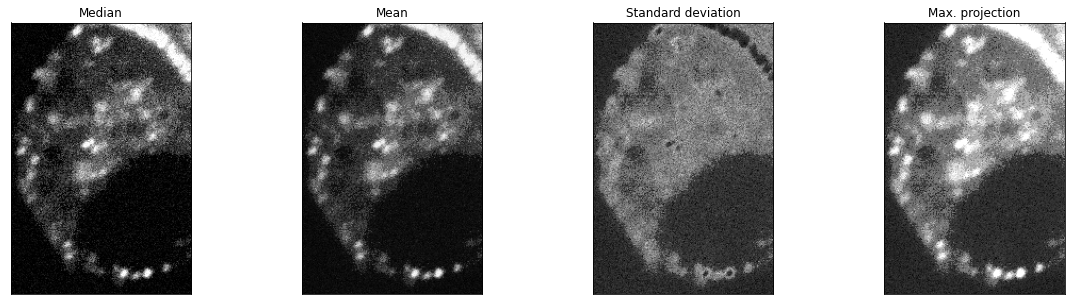

In [3]:
npad = 10
baseline = KalmanDenoiser.get_baseline(stack, npad)
fig = plot_stack_summary(baseline)
viewstack(baseline)

### Apply Kalman filtering and compare outputs

 21/10/2021 18:23:02: constructing 10-frames baseline from 90-frames stack...
 21/10/2021 18:23:02: filtering 90-frames stack with KalmanDenoiser(gain=0.8, var=0.05, npad=10)


100%|██████████| 99/99 [00:00<00:00, 2028.06it/s]


 21/10/2021 18:23:02: stack size: (90, 256, 170)
 21/10/2021 18:23:02: rendering stacks view...


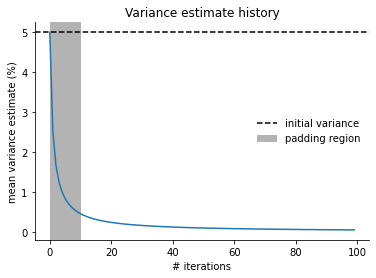

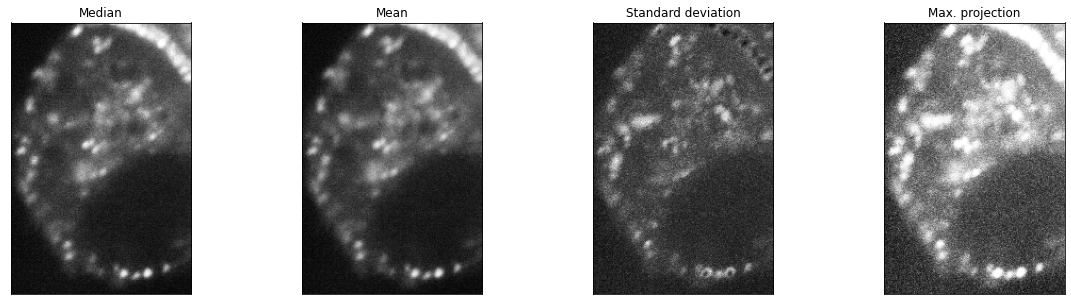

In [5]:
kd = KalmanDenoiser(G=0.8, V=0.05, npad=npad)
filtered_stack, ex_history = kd.filter(stack, full_output=True)
fig1 = kd.plot_variance_history(ex_history);
fig2 = plot_stack_summary(filtered_stack);
viewstacks({'raw': stack, 'filtered': filtered_stack}, suptitle=kd)